# Spectral

This notebook illustrates the spectral embedding of a graph by the [spectral decomposition](https://scikit-network.readthedocs.io/en/latest/reference/embedding.html#module-sknetwork.embedding) of the Laplacian.

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency, labels = skn.toy_graphs.karate_club(return_labels=True)
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Embedding**

In [4]:
spectral = skn.embedding.Spectral()
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, energy_scaling=True, force_biadjacency=False, solver=LanczosEig(which='SM'))

In [5]:
embedding = spectral.embedding_
embedding.shape

(34, 2)

**Visualization**

In [6]:
from networkx import from_scipy_sparse_matrix, draw

In [7]:
graph = from_scipy_sparse_matrix(adjacency)

In [8]:
colors = ['r','b']

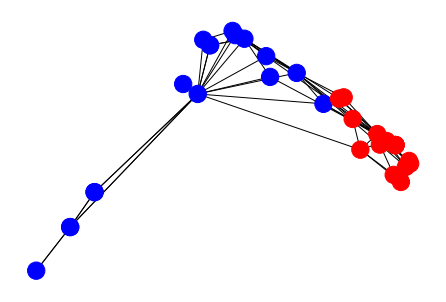

In [10]:
draw(graph, pos = embedding, node_color = [colors[l] for l in labels])

**Metrics**

In [11]:
skn.embedding.dot_modularity(adjacency, embedding)

0.6614203704862571

**Parameters**

In [12]:
# embedding dimension
spectral = skn.embedding.Spectral(embedding_dimension=10)
spectral.fit(adjacency)

Spectral(embedding_dimension=10, normalized_laplacian=True, regularization=0.01, energy_scaling=True, force_biadjacency=False, solver=LanczosEig(which='SM'))

In [13]:
# regularization
spectral = skn.embedding.Spectral(regularization=1)
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=1, energy_scaling=True, force_biadjacency=False, solver=LanczosEig(which='SM'))

In [14]:
# regular Laplacian
spectral = skn.embedding.Spectral(normalized_laplacian=False)
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=False, regularization=0.01, energy_scaling=True, force_biadjacency=False, solver=LanczosEig(which='SM'))

In [15]:
# solver
spectral = skn.embedding.Spectral(solver='halko')
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, energy_scaling=True, force_biadjacency=False, solver=HalkoEig(which='SM', n_oversamples=10, n_iter='auto', power_iteration_normalizer='auto', one_pass=False))

## Directed graphs

**Loading**

In [16]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Embedding**

In [17]:
# embedding of the graph considered as bipartite (each node considered twice)
spectral = skn.embedding.Spectral()
spectral.fit(adjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, energy_scaling=True, force_biadjacency=False, solver=LanczosEig(which='SM'))

In [18]:
embedding = spectral.embedding_
embedding.shape

(14, 2)

**Visualization**

In [19]:
from networkx import from_scipy_sparse_matrix, draw, DiGraph

In [20]:
graph = from_scipy_sparse_matrix(adjacency,create_using=DiGraph())

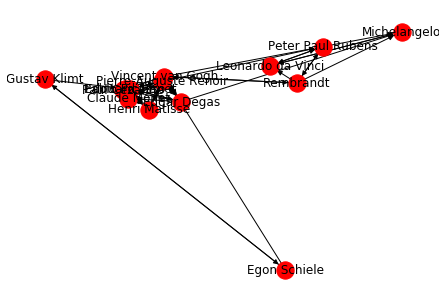

In [22]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos = embedding, node_color = 'r', labels = names)

**Metrics**

In [23]:
skn.embedding.dot_modularity(adjacency, embedding)

0.21065387442298952

## Bipartite graphs

**Loading**

In [24]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Embedding**

In [25]:
spectral = skn.embedding.Spectral()
spectral.fit(biadjacency)

Spectral(embedding_dimension=2, normalized_laplacian=True, regularization=0.01, energy_scaling=True, force_biadjacency=False, solver=LanczosEig(which='SM'))

In [26]:
embedding = spectral.embedding_
embedding.shape

(15, 2)

In [27]:
coembedding = spectral.coembedding_
coembedding.shape

(16, 2)

**Visualization**

In [28]:
from networkx import from_scipy_sparse_matrix, draw

In [29]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [30]:
graph = from_scipy_sparse_matrix(adjacency)

In [31]:
n,p = biadjacency.shape
pos = {i: embedding[i,:] for i in range(n)} 
pos.update({n + i: coembedding[i,:] for i in range(p)})

In [32]:
colors = n * ['r'] + p * ['b']

In [33]:
names = movies
names.update({n + i: actors[i] for i in actors})

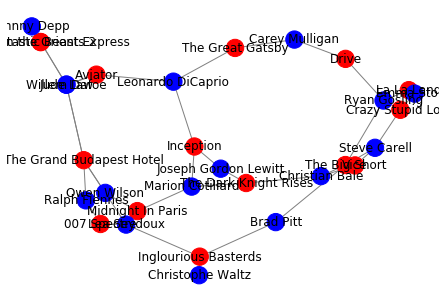

In [34]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=colors, labels = names, edge_color = 'grey')